In [4]:
import networkx as nx
from operator import itemgetter
import matplotlib.pyplot as plt

from ArxivCrawler.ArxivAuthorRelationship import ArxivAuthorRelationship
from ArxivCrawler.ArxivAuthorRelationshipCollection import ArxivAuthorRelationshipCollection

## Read dataset

In [5]:
collection = ArxivAuthorRelationshipCollection()
collection.Load("cleaned_result.xml")

## initiate Arxiv co-author Graph

In [6]:
G = nx.DiGraph()
relation :ArxivAuthorRelationship
for relation in collection.RelationshipList:
    first_author = relation.AuthorName
    G.add_node(first_author)
    co_authors = relation.CoauthorList
    for co_author in co_authors:
        G.add_node(co_author)
        G.add_edge(co_author, first_author)


print(f"Total nodes in graph: {G.number_of_nodes()}")
print(f"Total edges in graph: {G.number_of_edges()}")

Total nodes in graph: 15173
Total edges in graph: 23577


## visualization graph
- sorted by top 500 degree centrality

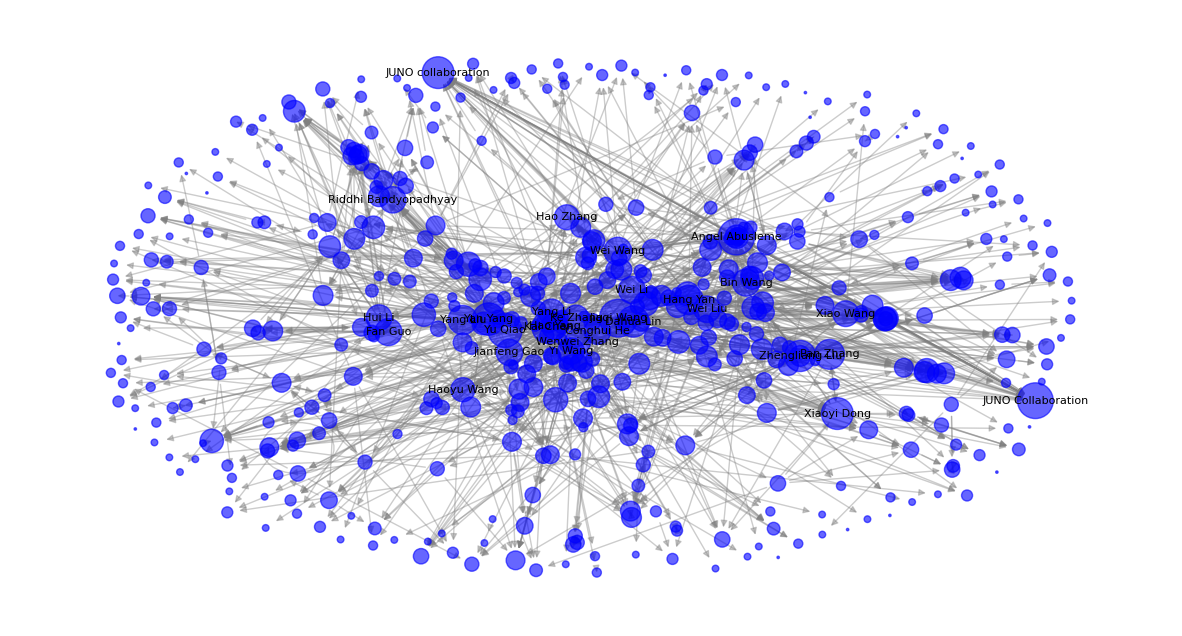

In [7]:


# Assuming 'subgraph' has already been defined with the top 500 nodes by degree
# Set the seed for reproducibility
seed = 13648
# Sort nodes by degree and get the top 500
top_nodes = sorted(G.degree(), key=itemgetter(1), reverse=True)[:500]
 
# Extract just the node names from the top_nodes
top_nodes = [node for node, degree in top_nodes]

# Create a subgraph with just the top 500 nodes
subgraph = G.subgraph(top_nodes)
# Compute the positions of the nodes using one of the layout algorithms
pos = nx.spring_layout(subgraph, seed=seed)
 
# Define node sizes based on degree
node_sizes = [3 + 20 * subgraph.degree(n) for n in subgraph.nodes()]

# Optionally, define node labels for nodes with the highest degrees
# Selecting the top X nodes by degree to label
top_degree_nodes = sorted(subgraph.degree(), key=itemgetter(1), reverse=True)[:30]  # Adjust X to your preference
node_labels = {node: node for node, _ in top_degree_nodes}
# Change plot size here
plt.figure(figsize=(15, 8))  # Set the figure size (width, height) in inches

# Draw the nodes
nx.draw_networkx_nodes(subgraph, pos, node_size=node_sizes, node_color='blue', alpha=0.6)

# Draw the edges
edges = nx.draw_networkx_edges(
    subgraph,
    pos,
    width=1,
    edge_color='gray',
    alpha=0.4  # Adjust edge transparency
)

# Draw the node labels for the top X nodes
nx.draw_networkx_labels(subgraph, pos, labels=node_labels, font_size=8)
# plt.figure(figsize=(15, 10))
plt.axis('off')  # Turn off the axis
plt.show()


### Let's also try top 100

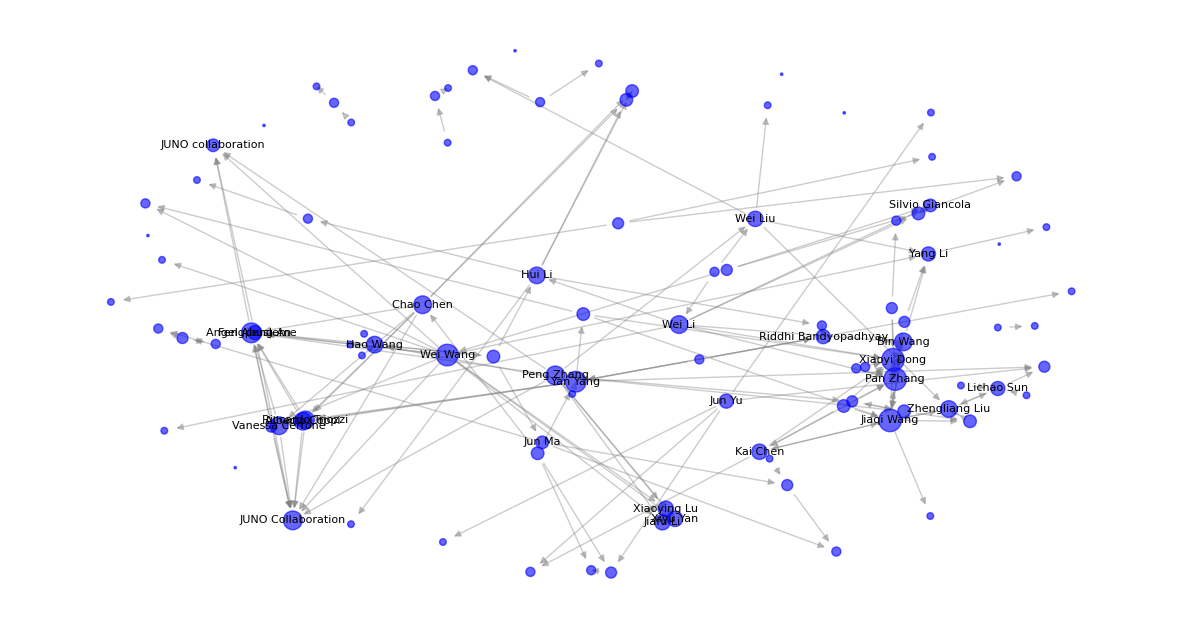

In [14]:
# Assuming 'subgraph' has already been defined with the top 500 nodes by degree
# Set the seed for reproducibility
seed = 123
# Sort nodes by degree and get the top 500
top_nodes = sorted(G.degree(), key=itemgetter(1), reverse=True)[:100]
 
# Extract just the node names from the top_nodes
top_nodes = [node for node, degree in top_nodes]

# Create a subgraph with just the top 500 nodes
subgraph = G.subgraph(top_nodes)
# Compute the positions of the nodes using one of the layout algorithms
pos = nx.spring_layout(subgraph, seed=seed)
 
# Define node sizes based on degree
node_sizes = [3 + 20 * subgraph.degree(n) for n in subgraph.nodes()]

# Optionally, define node labels for nodes with the highest degrees
# Selecting the top X nodes by degree to label
top_degree_nodes = sorted(subgraph.degree(), key=itemgetter(1), reverse=True)[:30]  # Adjust X to your preference
node_labels = {node: node for node, _ in top_degree_nodes}
# Change plot size here
plt.figure(figsize=(15, 8))  # Set the figure size (width, height) in inches

# Draw the nodes
nx.draw_networkx_nodes(subgraph, pos, node_size=node_sizes, node_color='blue', alpha=0.6)

# Draw the edges
edges = nx.draw_networkx_edges(
    subgraph,
    pos,
    width=1,
    edge_color='gray',
    alpha=0.4  # Adjust edge transparency
)

# Draw the node labels for the top X nodes
nx.draw_networkx_labels(subgraph, pos, labels=node_labels, font_size=8)
# plt.figure(figsize=(15, 10))
plt.axis('off')  # Turn off the axis
plt.show()

## plot histogram

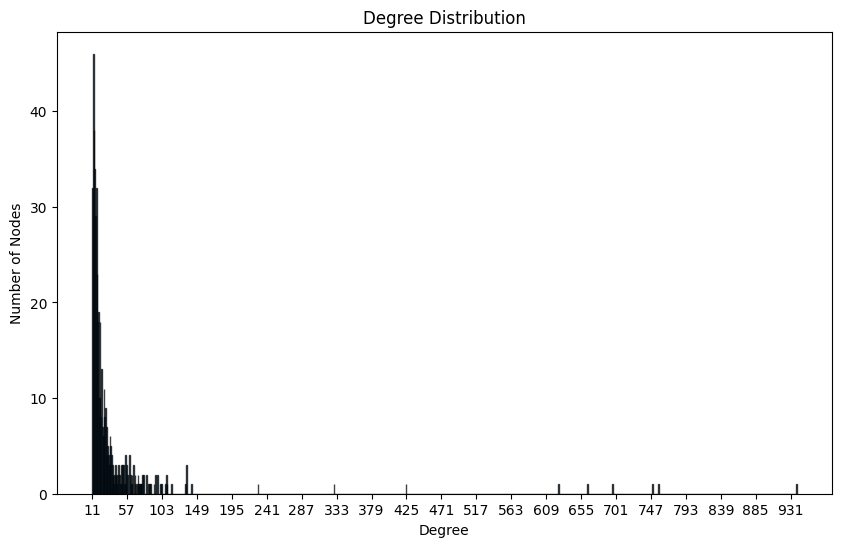

In [10]:
G500 = sorted(G.degree(), key=itemgetter(1), reverse=True)[:500]
# Calculate degrees of all nodes
degrees = [degree for node, degree in G500]

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(degrees, bins=range(min(degrees), max(degrees) + 1, 1), alpha=0.75, edgecolor='black')
# plt.hist(degrees, bins=50, alpha=0.75, edgecolor='black')  # Let Matplotlib choose the number of bins

plt.title('Degree Distribution')
plt.xlabel('Degree')
plt.ylabel('Number of Nodes')
# plt.xticks(range(min(degrees), max(degrees) + 1, 1))  # Ensure ticks match the degree values
plt.xticks(range(min(degrees), max(degrees) + 1, max(1, (max(degrees) - min(degrees)) // 20)))
plt.show()

## Clustering Coefficient

In [23]:
# Get the top 500 nodes by degree
top_500_nodes = [node for node, degree in sorted(G.degree(), key=itemgetter(1), reverse=True)[:500]]

# Create a subgraph with these nodes
G500 = G.subgraph(top_500_nodes)
clustering_coefficient = nx.average_clustering(G500)
clustering_coefficient

0.18676116297862116

## Plot Measures
- pagerank
- closeness_centrality
- betweenness_centrality
- eigenvector_centrality

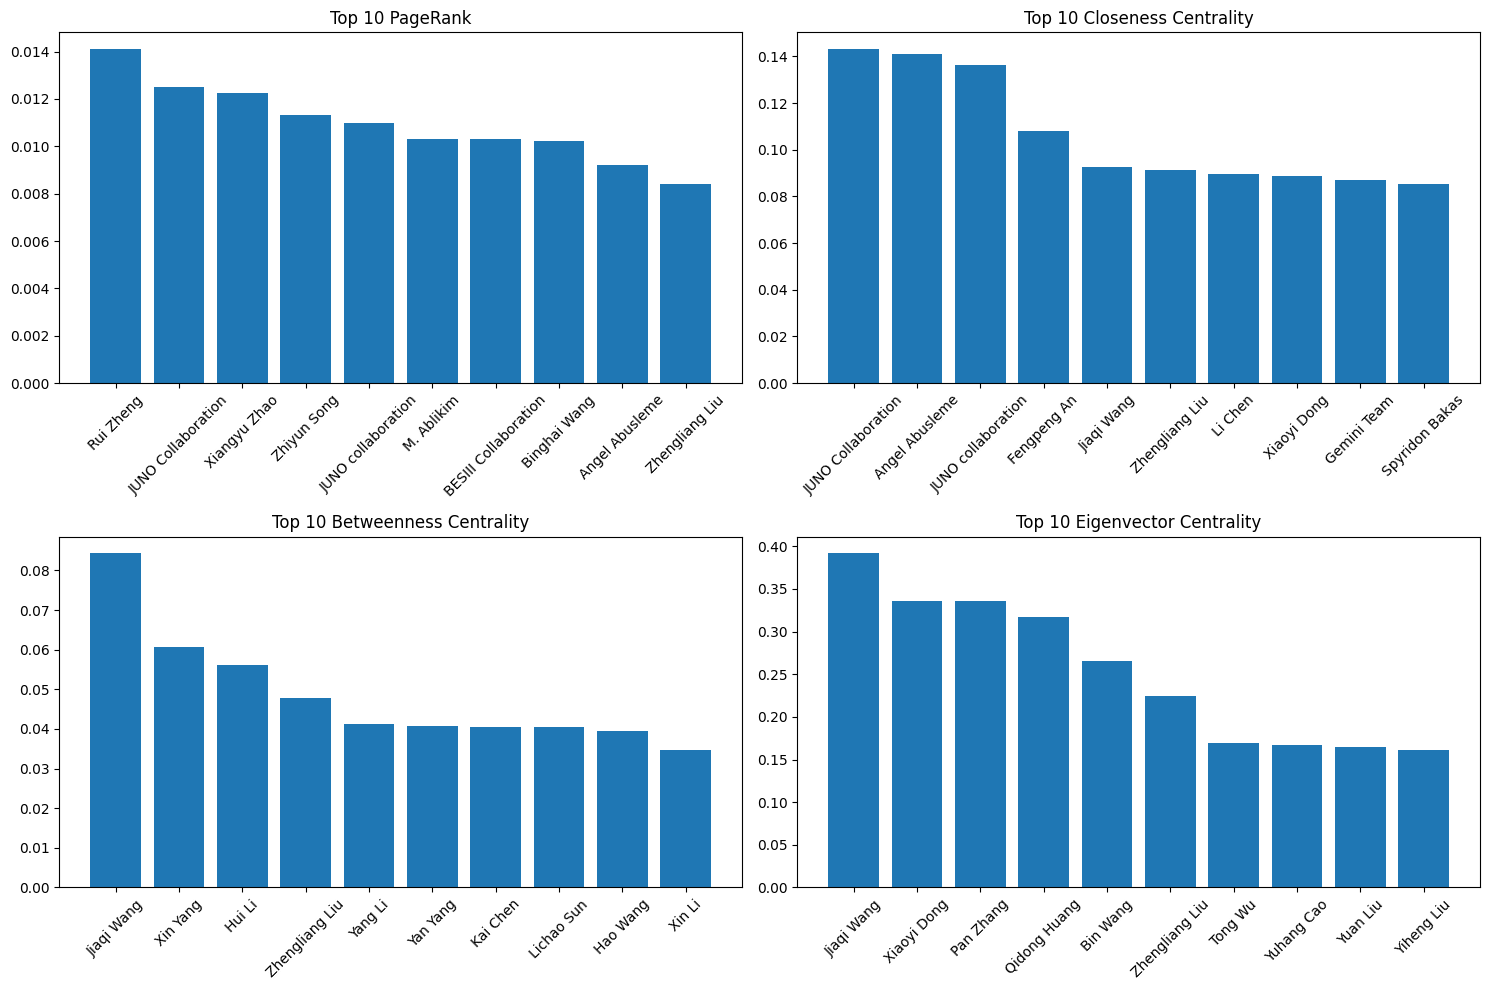

In [41]:
import networkx as nx
import matplotlib.pyplot as plt

# Assuming G500 is your NetworkX graph
pagerank = nx.pagerank(G500)
closeness_centrality = nx.closeness_centrality(G500)
betweenness_centrality = nx.betweenness_centrality(G500)
eigenvector_centrality = nx.eigenvector_centrality(G500)

# Function to sort and get top 10
def get_top_10(centrality_dict):
    return sorted(centrality_dict.items(), key=lambda x: x[1], reverse=True)[:10]

# Getting top 10 for each centrality measure
top_10_pagerank = get_top_10(pagerank)
top_10_closeness = get_top_10(closeness_centrality)
top_10_betweenness = get_top_10(betweenness_centrality)
top_10_eigenvector = get_top_10(eigenvector_centrality)

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Helper function to plot top 10 nodes for a centrality measure
def plot_top_10(ax, top_10, title):
    nodes, values = zip(*top_10)
    ax.bar(range(len(nodes)), values, tick_label=nodes)
    ax.set_title(title)
    ax.tick_params(axis='x', rotation=45)

# PageRank
plot_top_10(axs[0, 0], top_10_pagerank, 'Top 10 PageRank')

# Closeness Centrality
plot_top_10(axs[0, 1], top_10_closeness, 'Top 10 Closeness Centrality')

# Betweenness Centrality
plot_top_10(axs[1, 0], top_10_betweenness, 'Top 10 Betweenness Centrality')

# Eigenvector Centrality
plot_top_10(axs[1, 1], top_10_eigenvector, 'Top 10 Eigenvector Centrality')

plt.tight_layout()
plt.show()
